# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kurt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

news_api = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = news_api.get_everything(
    q='bitcoin',
    language='en'
    )

In [5]:
# Fetch the Ethereum news articles
eth_articles = news_api.get_everything(
    q='ethereum',
    language='en'
    )

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.050615,0.05330,0.058800,0.888000
std,0.386936,0.06088,0.069032,0.091378
min,-0.859300,0.00000,0.000000,0.646000
25%,-0.381800,0.00000,0.000000,0.859750
50%,0.000000,0.04150,0.050000,0.899500
75%,0.296000,0.08100,0.083250,0.948500
max,0.526700,0.18700,0.300000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.037305,0.038550,0.050900,0.910550
std,0.405662,0.045731,0.085822,0.083012
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.381800,0.000000,0.000000,0.894500
50%,0.000000,0.017000,0.020000,0.925000
75%,0.328950,0.076500,0.076250,0.955750
max,0.585900,0.134000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw.add('char')

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    tokens_list_of_lists = []
    for text in text['text']:
        # Remove the punctuation from text
        regex = re.compile('[^a-zA-Z ]')
        re_clean = regex.sub('', text)
    
        # Create a tokenized list of the words
        words = word_tokenize(re_clean)
    
        # Lemmatize words into root words
        lem = [lemmatizer.lemmatize(word) for word in words]
   
        # Convert the words to lowercase
        lowercase = [word.lower() for word in lem]
    
        # Remove the stop words
        tokens = [word for word in lowercase if word not in sw]
        
        tokens_list_of_lists.append(tokens)
    
    return tokens_list_of_lists

In [13]:
# Create a flat list of tokenized words
tokenizer(btc_df)

[['new',
  'york',
  'lawmaker',
  'passed',
  'bill',
  'would',
  'temporarily',
  'ban',
  'new',
  'bitcoin',
  'mining',
  'operation',
  'early',
  'friday',
  'state',
  'senator',
  'voted',
  'pas',
  'legislation',
  'bound',
  'desk'],
 ['rapper',
  'entrepreneur',
  'shawn',
  'carter',
  'better',
  'known',
  'jayz',
  'bringing',
  'bitcoin',
  'place',
  'grew',
  'thursday',
  'jayz',
  'former',
  'twitter',
  'ceo',
  'jack',
  'dorsey',
  'announced',
  'launch',
  'bitcoin'],
 ['new',
  'study',
  'bitcoin',
  'call',
  'question',
  'whether',
  'digital',
  'currency',
  'truly',
  'decentralized',
  'anonymous',
  'biggest',
  'devotee',
  'would',
  'believe',
  'researchers',
  'baylor',
  'rice'],
 ['image',
  'caption',
  'president',
  'faustinarchange',
  'touadra',
  'want',
  'rethink',
  'country',
  'economic',
  'philosophythe',
  'central',
  'african',
  'republics',
  'decision',
  'adopt',
  'bitcoin',
  'legal',
  'tender',
  'came',
  'surprise'

In [14]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = tokenizer(btc_df)

In [15]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = tokenizer(eth_df)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Create a 1D list of tokenized words for BTC
btc_tokens_list_1D = []
for article in tokenizer(btc_df):
    for word in article:
        btc_tokens_list_1D.append(word)

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens_list_1D, n=2))
print(btc_bigram_counts)

Counter({('june', 'reuters'): 4, ('reuters', 'bitcoin'): 4, ('world', 'biggest'): 3, ('biggest', 'bestknown'): 3, ('bestknown', 'cryptocurrency'): 3, ('new', 'blockchain'): 3, ('seth', 'greens'): 3, ('bitcoin', 'mining'): 2, ('digital', 'currency'): 2, ('legal', 'tender'): 2, ('pay', 'burrito'): 2, ('gmt', 'monday'): 2, ('bitcoin', 'dropped'): 2, ('dropped', 'gmt'): 2, ('losing', 'previous'): 2, ('previous', 'closebitcoin'): 2, ('closebitcoin', 'world'): 2, ('blockchain', 'new'): 2, ('new', 'luna'): 2, ('luna', 'token'): 2, ('greens', 'animated'): 2, ('animated', 'show'): 2, ('show', 'starring'): 2, ('starring', 'stolen'): 2, ('stolen', 'nft'): 2, ('nft', 'air'): 2, ('air', 'largest'): 2, ('largest', 'stablecoin'): 2, ('stablecoin', 'issuer'): 2, ('issuer', 'world'): 2, ('world', 'launched'): 2, ('launched', 'token'): 2, ('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'

In [19]:
# Create a 1D list of tokenized words for ETH
eth_tokens_list_1D = []
for article in tokenizer(eth_df):
    for word in article:
        eth_tokens_list_1D.append(word)

In [20]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokens_list_1D, n=2))
print(eth_bigram_counts)

Counter({('june', 'reuters'): 3, ('reuters', 'bitcoin'): 3, ('world', 'biggest'): 3, ('biggest', 'bestknown'): 3, ('bestknown', 'cryptocurrency'): 3, ('crypto', 'winter'): 2, ('bill', 'would'): 2, ('mining', 'operation'): 2, ('largest', 'cryptocurrency'): 2, ('gmt', 'monday'): 2, ('bitcoin', 'dropped'): 2, ('dropped', 'gmt'): 2, ('losing', 'previous'): 2, ('previous', 'closebitcoin'): 2, ('closebitcoin', 'world'): 2, ('cryptocurrency', 'boom'): 2, ('boom', 'past'): 2, ('past', 'year'): 2, ('year', 'ha'): 2, ('ha', 'helped'): 2, ('helped', 'propel'): 2, ('propel', 'newer'): 2, ('newer', 'market'): 2, ('market', 'record'): 2, ('record', 'height'): 2, ('height', 'digital'): 2, ('digital', 'collectible'): 2, ('collectible', 'known'): 2, ('known', 'nftsthe'): 2, ('nftsthe', 'craze'): 2, ('craze', 'ha'): 2, ('ha', 'pushed'): 2, ('pushed', 'total'): 2, ('total', 'nft'): 2, ('nft', 'sale'): 2, ('sale', 'volume'): 2, ('volume', 'billion'): 2, ('billion', 'ov'): 2, ('nft', 'marketplace'): 2, ('g

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens_list_1D)

[('bitcoin', 16),
 ('new', 8),
 ('token', 6),
 ('cryptocurrency', 6),
 ('world', 6),
 ('biggest', 5),
 ('blockchain', 5),
 ('reuters', 5),
 ('cryptocurrencies', 4),
 ('june', 4)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens_list_1D)

[('cryptocurrency', 11),
 ('ha', 6),
 ('crypto', 5),
 ('new', 4),
 ('bitcoin', 4),
 ('reuters', 4),
 ('market', 4),
 ('year', 4),
 ('nft', 4),
 ('video', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

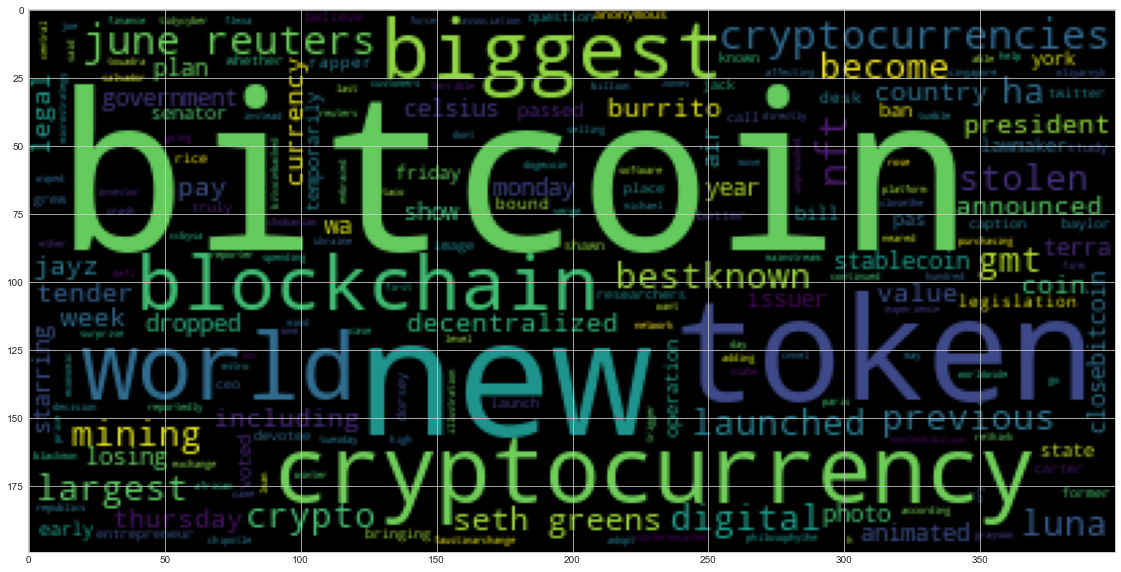

In [25]:
# Generate the Bitcoin word cloud
wc_input = ' '.join(btc_tokens_list_1D)
wc = WordCloud().generate(wc_input)
plt.imshow(wc)

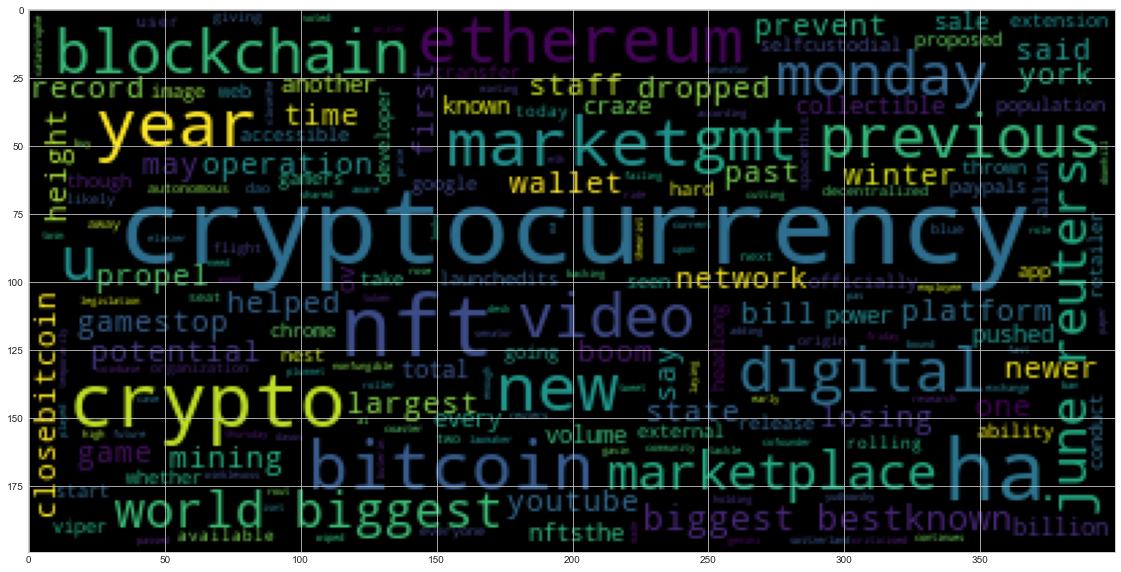

In [26]:
# Generate the Ethereum word cloud
wc_input = ' '.join(eth_tokens_list_1D)
wc = WordCloud().generate(wc_input)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 2.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_bigstring = ' '.join(btc_tokens_list_1D)
btc_bigstring

'new york lawmaker passed bill would temporarily ban new bitcoin mining operation early friday state senator voted pas legislation bound desk rapper entrepreneur shawn carter better known jayz bringing bitcoin place grew thursday jayz former twitter ceo jack dorsey announced launch bitcoin new study bitcoin call question whether digital currency truly decentralized anonymous biggest devotee would believe researchers baylor rice image caption president faustinarchange touadra want rethink country economic philosophythe central african republics decision adopt bitcoin legal tender came surprise reportedly pay burrito taco bitcoin digital currency case dont mind spending coin directly instead going exchange first flexa h joe tidycyber reporter cryptocurrencies continued tumble week billion wiped value token like bitcoin crash affecting investor worldwide including go cnnel salvador ha embraced bitcoin like country government purchasing hundred coin last year announced cryptocurrency would

In [31]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_bigstring)

# Add a title to the document


In [32]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [33]:
# List all Entities
btc_doc.ents

(new york,
 early friday,
 pas,
 jayz,
 thursday,
 jayz,
 ceo jack dorsey,
 first,
 h joe,
 week billion,
 hundred,
 last year,
 paris,
 one,
 grayson,
 michael chobanian,
 june,
 gmt monday,
 year,
 june,
 monday,
 june,
 reuters,
 tuesday,
 microstrategy inc mstro,
 june,
 thursday,
 winter ninth week,
 two,
 today,
 citizen world shackle bank national government sceptic)

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_bigstring = ' '.join(eth_tokens_list_1D)
eth_bigstring

'gamestop ha officially thrown headlong web viper nest new app release though hard say whether proposed population gamers game developer take gamestop going allin crypto video game retailer launchedits selfcustodial ethereum digital wallet said monday wallet accessible google chrome extension ability conduct external transfer paypals crypto platform image seen start rolling user today available everyone us next decentralized autonomous organization dao giving away two seat blue origin flight spacethis likely first time nonfungible token nfts played role minting crypto winter may ethereum looks like buy winklevoss twin cutting staff gemini say crypto winter upon u price ethereum cryptocurrency eth new york lawmaker passed bill would temporarily ban new bitcoin mining operation early friday state senator voted pas legislation bound desk davos switzerland may reuters ethereums cofounder gavin wood said cryptocurrency investor need aware backing holding market rout wiped crypto roller coas

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_bigstring)

# Add a title to the document


In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [37]:
# List all Entities
eth_doc.ents

(monday,
 today,
 two,
 first,
 u price,
 new york,
 early friday,
 pas,
 switzerland,
 gavin wood,
 one,
 june,
 reuters,
 gmt monday,
 year,
 june,
 monday,
 june,
 thursday,
 yudkowsky,
 elon musk,
 first,
 several year ago,
 followed trou,
 kim kardashian,
 nba,
 third,
 wednesday)

---